In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/options.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/financials.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/secondary_stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/trades.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/__init__.py
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_fin_spec.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/trades_spec.csv
/kaggle/input/jpx-tokyo-stock-

In [2]:
import math # Mathematical functions
from datetime import date # Date Functions 
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data 
import matplotlib.dates as mdates # Formatting dates
import seaborn as sns # Visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings, gc
import matplotlib.colors

In [3]:
stock_price=pd.read_csv("/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv", parse_dates=['Date'])
stock_price.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [4]:
# Plot line charts
# df_plot = stock_price[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Target']].copy()
# df_plot = df_plot.set_index('Date')

# ncols = 2
# nrows = int(round(df_plot.shape[1] / ncols, 0))

# fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
# for i, ax in enumerate(fig.axes):
#         sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
#         ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
#         ax.xaxis.set_major_locator(mdates.AutoDateLocator())
# fig.tight_layout()
# plt.show()

In [5]:
#Data Distribution
# ncols = 2
# nrows = int(round(df_plot.shape[1] / ncols, 0))

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
# for ax, feature in zip(axes.flat, df_plot.columns):
#     sns.histplot(df_plot[feature] , color="skyblue", ax=ax)
# fig.tight_layout()
# plt.show()

In [6]:
#Check for missing data
print('No missing data') if sum(stock_price.isna().sum()) == 0 else stock_price.isna().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64

In [7]:
#Visuals for Missing Data
# df_no_prices = stock_price[stock_price['Close'].isna()]

# no_prices_per_date = df_no_prices['Date'].value_counts().sort_index()
# all_dates = sorted(stock_price['Date'].unique())
# no_prices_per_date = no_prices_per_date.reindex(all_dates, fill_value=0)

In [8]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [9]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=no_prices_per_date.index, 
#                          y=no_prices_per_date, 
#                          mode='lines'))

# fig.update_layout(
#     title=f"Stocks without Prices per Date",
#     xaxis_title="Date",
#     yaxis_title="Stock Count",
# )

# fig.show()

In [10]:
#Selecting 3 Secuities to check each of their individual Performances
prices_1301 = stock_price.loc[(stock_price['SecuritiesCode'].isin([1301]))]
prices_7282 = stock_price.loc[(stock_price['SecuritiesCode'].isin([7282]))]
prices_7414 = stock_price.loc[(stock_price['SecuritiesCode'].isin([7414]))]

def plotMovingAverage(series, window, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

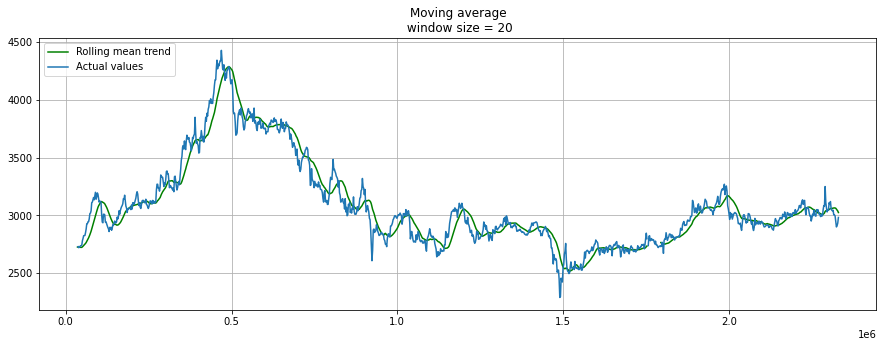

In [11]:
plotMovingAverage(prices_1301['Close'], 20)

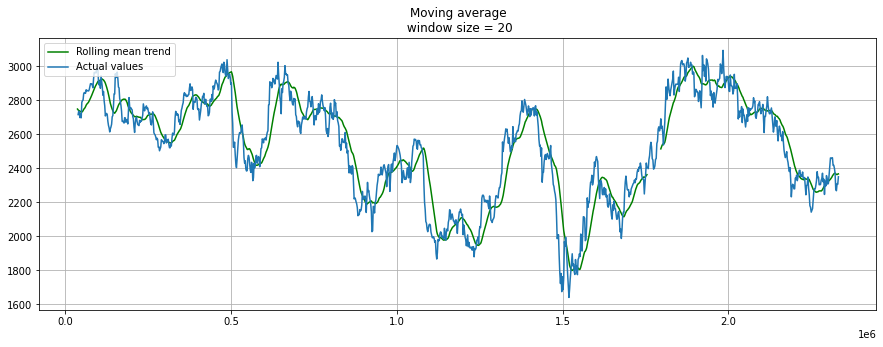

In [12]:
plotMovingAverage(prices_7282['Close'], 20)

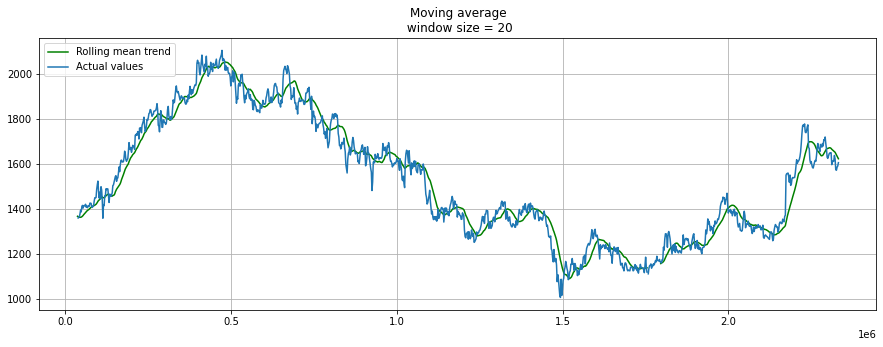

In [13]:
plotMovingAverage(prices_7414['Close'], 20)

In [14]:
# We will interpolate data for Close as we would need it for feature generation
stock_price = stock_price.assign(InterpolateOpen=stock_price.Open.interpolate(method='linear'))
stock_price = stock_price.assign(InterpolateHigh=stock_price.High.interpolate(method='linear'))
stock_price = stock_price.assign(InterpolateLow=stock_price.Low.interpolate(method='linear'))
stock_price = stock_price.assign(InterpolateClose=stock_price.Close.interpolate(method='linear'))
# stock_price = stock_price.assign(InterpolateTarget=stock_price.Target.interpolate(method='linear'))

stock_price.loc[stock_price['Open'].isnull(),'Open'] = stock_price['InterpolateOpen']
stock_price.loc[stock_price['High'].isnull(),'High'] = stock_price['InterpolateHigh']
stock_price.loc[stock_price['Low'].isnull(),'Low'] = stock_price['InterpolateLow']
stock_price.loc[stock_price['Close'].isnull(),'Close'] = stock_price['InterpolateClose']
# stock_price.loc[stock_price['Target'].isnull(),'Target'] = stock_price['InterpolateTarget']

stock_price = stock_price.drop('InterpolateOpen', axis = 1)
stock_price = stock_price.drop('InterpolateHigh', axis = 1)
stock_price = stock_price.drop('InterpolateLow', axis = 1)
stock_price = stock_price.drop('InterpolateClose', axis = 1)
# stock_price = stock_price.drop('InterpolateTarget', axis = 1)
print('No missing data') if sum(stock_price.isna().sum()) == 0 else stock_price.isna().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64

In [15]:
from decimal import ROUND_HALF_UP, Decimal
from tqdm import tqdm

def adjust_price(price):
    """
    Args:
        price (pd.DataFrame)  : pd.DataFrame include stock_price
    Returns:
        price DataFrame (pd.DataFrame): stock_price with generated AdjustedClose
    """
    # transform Date column into datetime
    price.loc[: ,"Date"] = pd.to_datetime(price.loc[: ,"Date"], format="%Y-%m-%d")

    def generate_adjusted_close(df):
        """
        Args:
            df (pd.DataFrame)  : stock_price for a single SecuritiesCode
        Returns:
            df (pd.DataFrame): stock_price with AdjustedClose for a single SecuritiesCode
        """
        # sort data to generate CumulativeAdjustmentFactor
        df = df.sort_values("Date", ascending=False)
        # generate CumulativeAdjustmentFactor
        df.loc[:, "CumulativeAdjustmentFactor"] = df["AdjustmentFactor"].cumprod()
        # generate AdjustedClose
        df.loc[:, "AdjustedClose"] = (
            df["CumulativeAdjustmentFactor"] * df["Close"]
        ).map(lambda x: float(
            Decimal(str(x)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
        ))
        # reverse order
        df = df.sort_values("Date")
        # to fill AdjustedClose, replace 0 into np.nan
        df.loc[df["AdjustedClose"] == 0, "AdjustedClose"] = np.nan
        # forward fill AdjustedClose
        df.loc[:, "AdjustedClose"] = df.loc[:, "AdjustedClose"].ffill()
        return df

    # generate AdjustedClose
    price = price.sort_values(["SecuritiesCode", "Date"])
    price = price.groupby("SecuritiesCode").apply(generate_adjusted_close).reset_index(drop=True)

    # price.set_index("Date", inplace=True)
    return price

In [16]:
# generate AdjustedClose
stock_price = adjust_price(stock_price)

In [17]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

#Features Return % & Market Volatality
def get_features_for_predict(price, code):
    """
    Args:
        price (pd.DataFrame)  : pd.DataFrame include stock_price
        code (int)  : A local code for a listed company
    Returns:
        feature DataFrame (pd.DataFrame)
    """
    close_col = "AdjustedClose"
    feats = price.loc[price["SecuritiesCode"] == code, ['Date', 'SecuritiesCode', 'Open', 'High', 'Low', close_col, 'Target']].copy()

    # calculate return 5 days using AdjustedClose
    feats["return_5"] = feats[close_col].pct_change(5)
    # calculate last 10 days return using AdjustedClose
    feats["return_10"] = feats[close_col].pct_change(10)
    # calculate last 20 days return using AdjustedClose
    feats["return_20"] = feats[close_col].pct_change(20)
    feats["return_30"] = feats[close_col].pct_change(30)
    # calculate last 50 days return using AdjustedClose
    feats["return_50"] = feats[close_col].pct_change(50)


    # calculate historical volatility using AdjustedClose
    feats["volatility_5"] = (
        np.log(feats[close_col]).diff().rolling(5).std()
    )
    feats["volatility_10"] = (
        np.log(feats[close_col]).diff().rolling(10).std()
    )
    feats["volatility_20"] = (
        np.log(feats[close_col]).diff().rolling(20).std()
    )
    feats["volatility_30"] = (
        np.log(feats[close_col]).diff().rolling(30).std()
    )
    feats["volatility_50"] = (
        np.log(feats[close_col]).diff().rolling(50).std()
    )
    # calculate last bollinger band using AdjustedClose
    feats["bollinger_up"] = (
        (((feats[close_col]).rolling(20).mean()) + ((feats[close_col]).rolling(20).std()))*2
    )
    
    # calculate last bollinger band using AdjustedClose
    feats["bollinger_down"] = (
        (((feats[close_col]).rolling(20).mean()) - ((feats[close_col]).rolling(20).std()))*2
    )
    
    # calculate RSI
    feats["rsi"] = computeRSI(feats[close_col], 14)
    
    # Exponential Moving Averages (EMAS) - different periods
    feats['EMA5'] = feats[close_col].ewm(span=5, adjust=False).mean()
    feats['EMA10'] = feats[close_col].ewm(span=10, adjust=False).mean()
    feats['EMA20'] = feats[close_col].ewm(span=20, adjust=False).mean()
    feats['EMA30'] = feats[close_col].ewm(span=30, adjust=False).mean()
    feats['EMA50'] = feats[close_col].ewm(span=50, adjust=False).mean()
    
    
    # filling data for nan and inf
    feats = feats.fillna(0)
    feats = feats.replace([np.inf, -np.inf], 0)
    # drop AdjustedClose column
    # feats = feats.drop([close_col], axis=1)
    feat_col = [
    'Open',
    'High',
    'Low',
    'AdjustedClose',
#     'return_5',
#     'return_10',
#     'return_20',
#     'return_30',
#     'return_50',
#     'volatility_5',
#     'volatility_10',
#     'volatility_20',
#     'volatility_30',
#     'volatility_50',
    'bollinger_up',
    'bollinger_down',
    'rsi',
    'EMA5',
    'EMA10',
    'EMA20',
    'EMA30',
    'EMA50'
]
    feats[feat_col] = stdsc.fit_transform(feats[feat_col])
       
    return feats

In [18]:
# fetch prediction target SecuritiesCodes
codes = sorted(stock_price["SecuritiesCode"].unique())
len(codes)

# generate feature
buff = []
for code in tqdm(codes):
    feat = get_features_for_predict(stock_price, code)
    buff.append(feat)
feature = pd.concat(buff)

100%|██████████| 2000/2000 [01:06<00:00, 29.99it/s]


In [19]:
feature.head()

,Date,SecuritiesCode,Open,High,Low,AdjustedClose,Target,return_5,return_10,return_20,...,volatility_30,volatility_50,bollinger_up,bollinger_down,rsi,EMA5,EMA10,EMA20,EMA30,EMA50
0,2017-01-04,1301,-0.895044,-0.889685,-0.848417,-0.872001,0.000730,0.0,0.0,0.0,...,0.0,0.0,-5.618867,-5.593626,-3.868126,-0.882590,-0.887009,-0.893482,-0.899057,-0.910583
1,2017-01-05,1301,-0.871801,-0.910101,-0.835381,-0.882312,0.002920,0.0,0.0,0.0,...,0.0,0.0,-5.618867,-5.593626,-3.868126,-0.886073,-0.888921,-0.894494,-0.899750,-0.911013
2,2017-01-06,1301,-0.895044,-0.917757,-0.874488,-0.877156,-0.001092,0.0,0.0,0.0,...,0.0,0.0,-5.618867,-5.593626,-3.868126,-0.886653,-0.889529,-0.894904,-0.900051,-0.911211
3,2017-01-10,1301,-0.866636,-0.892237,-0.835381,-0.856535,-0.005100,0.0,0.0,0.0,...,0.0,0.0,-5.618867,-5.593626,-3.868126,-0.880075,-0.886203,-0.893250,-0.898948,-0.910542
4,2017-01-11,1301,-0.858889,-0.897341,-0.830167,-0.864268,-0.003295,0.0,0.0,0.0,...,0.0,0.0,-5.618867,-5.593626,-3.868126,-0.878302,-0.884916,-0.892513,-0.898436,-0.910221


In [20]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error,mean_absolute_error
from lightgbm import LGBMRegressor

ts_fold = TimeSeriesSplit(n_splits=10, gap=10000)
prices=feature.dropna().sort_values(['Date','SecuritiesCode'])
y=prices['Target'].to_numpy()
X=prices.drop(['Target'],axis=1)

In [21]:
def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size: int = 200, toprank_weight_ratio: float = 2) -> float:
    """
    Args:
        df (pd.DataFrame): predicted results
        portfolio_size (int): # of equities to buy/sell
        toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
    Returns:
        (float): sharpe ratio
    """
    def _calc_spread_return_per_day(df, portfolio_size, toprank_weight_ratio):
        """
        Args:
            df (pd.DataFrame): predicted results
            portfolio_size (int): # of equities to buy/sell
            toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
        Returns:
            (float): spread return
        """
        assert df['Rank'].min() == 0
        assert df['Rank'].max() == len(df['Rank']) - 1
        weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
        purchase = (df.sort_values(by='Rank')['Target'][:portfolio_size] * weights).sum() / weights.mean()
        short = (df.sort_values(by='Rank', ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
        return purchase - short

    buf = df.groupby('Date').apply(_calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    sharpe_ratio = buf.mean() / buf.std()
    return sharpe_ratio

In [22]:
feat_importance=pd.DataFrame()
sharpe_ratio=[]
    
for fold, (train_idx, val_idx) in enumerate(ts_fold.split(X, y)):
    
    print("\n========================== Fold {} ==========================".format(fold+1))
    X_train, y_train = X.iloc[train_idx,:], y[train_idx]
    X_valid, y_val = X.iloc[val_idx,:], y[val_idx]
    
    print("Train Date range: {} to {}".format(X_train.Date.min(),X_train.Date.max()))
    print("Valid Date range: {} to {}".format(X_valid.Date.min(),X_valid.Date.max()))
    
    X_train.drop(['Date','SecuritiesCode'], axis=1, inplace=True)
    X_val=X_valid[X_valid.columns[~X_valid.columns.isin(['Date','SecuritiesCode'])]]
    val_dates=X_valid.Date.unique()[1:-1]
    print("\nTrain Shape: {} {}, Valid Shape: {} {}".format(X_train.shape, y_train.shape, X_val.shape, y_val.shape))
    
    params = {'n_estimators': 500,
              'num_leaves' : 100,
              'learning_rate': 0.1,
              'colsample_bytree': 0.9,
              'subsample': 0.8,
              'reg_alpha': 0.4,
              'metric': 'mae',
              'random_state': 21}
    
    gbm = LGBMRegressor(**params).fit(X_train, y_train, 
                                      eval_set=[(X_train, y_train), (X_val, y_val)],
                                      verbose=300, 
                                      eval_metric=['mae','mse'])
    y_pred = gbm.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    feat_importance["Importance_Fold"+str(fold)]=gbm.feature_importances_
    feat_importance.set_index(X_train.columns, inplace=True)
    
    rank=[]
    X_val_df=X_valid[X_valid.Date.isin(val_dates)]
    for i in X_val_df.Date.unique():
        temp_df = X_val_df[X_val_df.Date == i].drop(['Date','SecuritiesCode'],axis=1)
        temp_df["pred"] = gbm.predict(temp_df)
        temp_df["Rank"] = (temp_df["pred"].rank(method="first", ascending=False)-1).astype(int)
        rank.append(temp_df["Rank"].values)

    stock_rank=pd.Series([x for y in rank for x in y], name="Rank")
    df=pd.concat([X_val_df.reset_index(drop=True),stock_rank,
                  prices[prices.Date.isin(val_dates)]['Target'].reset_index(drop=True)], axis=1)
    sharpe=calc_spread_return_sharpe(df)
    sharpe_ratio.append(sharpe)
    print("Valid Sharpe: {}, RMSE: {}, MAE: {}".format(sharpe,rmse,mae))
    
    del X_train, y_train,  X_val, y_val
    gc.collect()


========================== Fold 1 ==========================
Train Date range: 2017-01-04 00:00:00 to 2017-06-09 00:00:00
Valid Date range: 2017-06-19 00:00:00 to 2017-12-01 00:00:00

Train Shape: (202051, 22) (202051,), Valid Shape: (212048, 22) (212048,)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[300]	training's l2: 0.000281154	training's l1: 0.0111733	valid_1's l2: 0.000381937	valid_1's l1: 0.0123587
Valid Sharpe: 0.6178037957926882, RMSE: 0.019628323864428712, MAE: 0.012441709406521924

========================== Fold 2 ==========================
Train Date range: 2017-01-04 00:00:00 to 2017-11-22 00:00:00
Valid Date range: 2017-12-01 00:00:00 to 2018-05-18 00:00:00

Train Shape: (414099, 22) (414099,), Valid Shape: (212048, 22) (212048,)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[300]	training's l2: 0.000311659	training's l1: 0.0115165	valid_1's l2: 0.000519792	valid_1's l1: 0.0147856
Valid Sharpe: 0.7453260617169415, RMSE: 0.022853448005372746, MAE: 0.014837414288228313

========================== Fold 3 ==========================
Train Date range: 2017-01-04 00:00:00 to 2018-05-11 00:00:00
Valid Date range: 2018-05-18 00:00:00 to 2018-10-26 00:00:00

Train Shape: (626147, 22) (626147,), Valid Shape: (212048, 22) (212048,)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[300]	training's l2: 0.00036725	training's l1: 0.0124742	valid_1's l2: 0.000515999	valid_1's l1: 0.0154049
Valid Sharpe: 0.40413925099708836, RMSE: 0.02276163997553317, MAE: 0.01544645658626269

========================== Fold 4 ==========================
Train Date range: 2017-01-04 00:00:00 to 2018-10-19 00:00:00
Valid Date range: 2018-10-26 00:00:00 to 2019-04-11 00:00:00

Train Shape: (838195, 22) (838195,), Valid Shape: (212048, 22) (212048,)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[300]	training's l2: 0.000390327	training's l1: 0.013002	valid_1's l2: 0.000668333	valid_1's l1: 0.0175499
Valid Sharpe: 0.39086827185327594, RMSE: 0.025897814978619194, MAE: 0.01758988519528317

========================== Fold 5 ==========================
Train Date range: 2017-01-04 00:00:00 to 2019-04-04 00:00:00
Valid Date range: 2019-04-11 00:00:00 to 2019-09-25 00:00:00

Train Shape: (1050243, 22) (1050243,), Valid Shape: (212048, 22) (212048,)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[300]	training's l2: 0.000442491	training's l1: 0.0139113	valid_1's l2: 0.000466441	valid_1's l1: 0.0146945
Valid Sharpe: 0.6811371568388674, RMSE: 0.021626429518816725, MAE: 0.014722304089004047

========================== Fold 6 ==========================
Train Date range: 2017-01-04 00:00:00 to 2019-09-17 00:00:00
Valid Date range: 2019-09-25 00:00:00 to 2020-03-10 00:00:00

Train Shape: (1262291, 22) (1262291,), Valid Shape: (212048, 22) (212048,)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[300]	training's l2: 0.000445083	training's l1: 0.0140203	valid_1's l2: 0.000559894	valid_1's l1: 0.0154669
Valid Sharpe: 0.5280421515897622, RMSE: 0.023715103571429676, MAE: 0.015495613255239175

========================== Fold 7 ==========================
Train Date range: 2017-01-04 00:00:00 to 2020-03-02 00:00:00
Valid Date range: 2020-03-10 00:00:00 to 2020-08-18 00:00:00

Train Shape: (1474339, 22) (1474339,), Valid Shape: (212048, 22) (212048,)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[300]	training's l2: 0.000446578	training's l1: 0.0140427	valid_1's l2: 0.00110026	valid_1's l1: 0.0232009
Valid Sharpe: 0.11110463691620834, RMSE: 0.033230550530394816, MAE: 0.02325099369281043

========================== Fold 8 ==========================
Train Date range: 2017-01-04 00:00:00 to 2020-08-11 00:00:00
Valid Date range: 2020-08-18 00:00:00 to 2021-01-22 00:00:00

Train Shape: (1686387, 22) (1686387,), Valid Shape: (212048, 22) (212048,)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[300]	training's l2: 0.000516265	training's l1: 0.0151172	valid_1's l2: 0.000556255	valid_1's l1: 0.0160434
Valid Sharpe: 0.27762334868641697, RMSE: 0.023616756555618422, MAE: 0.016072339909246423

========================== Fold 9 ==========================
Train Date range: 2017-01-04 00:00:00 to 2021-01-15 00:00:00
Valid Date range: 2021-01-22 00:00:00 to 2021-06-29 00:00:00

Train Shape: (1898435, 22) (1898435,), Valid Shape: (212048, 22) (212048,)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[300]	training's l2: 0.000519514	training's l1: 0.0151971	valid_1's l2: 0.000482638	valid_1's l1: 0.0152456
Valid Sharpe: 0.5483223369336652, RMSE: 0.02198217355597216, MAE: 0.01525369495192248

========================== Fold 10 ==========================
Train Date range: 2017-01-04 00:00:00 to 2021-06-22 00:00:00
Valid Date range: 2021-06-29 00:00:00 to 2021-12-03 00:00:00

Train Shape: (2110483, 22) (2110483,), Valid Shape: (212048, 22) (212048,)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[300]	training's l2: 0.000515911	training's l1: 0.0152079	valid_1's l2: 0.000489285	valid_1's l1: 0.0150871
Valid Sharpe: 0.10598314447163978, RMSE: 0.022143517665723617, MAE: 0.01510617329127566


In [23]:
print("\nAverage cross-validation Sharpe Ratio: {:.4f}, standard deviation = {:.2f}.".format(np.mean(sharpe_ratio),np.std(sharpe_ratio)))


Average cross-validation Sharpe Ratio: 0.4410, standard deviation = 0.21.


In [24]:
feat_importance['avg'] = feat_importance.mean(axis=1)
feat_importance = feat_importance.sort_values(by='avg',ascending=True)
pal=sns.color_palette("plasma_r", 29).as_hex()[2:]

fig=go.Figure()
for i in range(len(feat_importance.index)):
    fig.add_shape(dict(type="line", y0=i, y1=i, x0=0, x1=feat_importance['avg'][i], 
                       line_color=pal[::-1][i],opacity=0.7,line_width=4))
fig.add_trace(go.Scatter(x=feat_importance['avg'], y=feat_importance.index, mode='markers', 
                         marker_color=pal[::-1], marker_size=8,
                         hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'))
fig.update_layout(title='Overall Feature Importance', 
                  xaxis=dict(title='Average Importance',zeroline=False),
                  yaxis_showgrid=False, margin=dict(l=120,t=80),
                  height=700, width=800)
fig.show()

In [25]:
cols_fin=feat_importance.avg.nlargest(5).index.tolist()
#cols_fin.extend(('Open','High','Low'))
X_train=feature[cols_fin]
y_train=feature['Target']
gbm = LGBMRegressor(**params).fit(X_train, y_train)

In [26]:
# load Time Series API
import jpx_tokyo_market_prediction
# make Time Series API environment (this function can be called only once in a session)
env = jpx_tokyo_market_prediction.make_env()
# get iterator to fetch data day by day
iter_test = env.iter_test()

In [27]:
#Features Return % & Market Volatality
def get_features_for_predict_new(price, code):
    """
    Args:
        price (pd.DataFrame)  : pd.DataFrame include stock_price
        code (int)  : A local code for a listed company
    Returns:
        feature DataFrame (pd.DataFrame)
    """
    close_col = "AdjustedClose"
    feats = price.loc[price["SecuritiesCode"] == code, ['Date', 'SecuritiesCode', 'Open', 'High', 'Low', close_col]].copy()

    # calculate return 5 days using AdjustedClose
    feats["return_5"] = feats[close_col].pct_change(5)
    # calculate last 10 days return using AdjustedClose
    feats["return_10"] = feats[close_col].pct_change(10)
    # calculate last 20 days return using AdjustedClose
    feats["return_20"] = feats[close_col].pct_change(20)
    feats["return_30"] = feats[close_col].pct_change(30)
    # calculate last 50 days return using AdjustedClose
    feats["return_50"] = feats[close_col].pct_change(50)


    # calculate historical volatility using AdjustedClose
    feats["volatility_5"] = (
        np.log(feats[close_col]).diff().rolling(5).std()
    )
    feats["volatility_10"] = (
        np.log(feats[close_col]).diff().rolling(10).std()
    )
    feats["volatility_20"] = (
        np.log(feats[close_col]).diff().rolling(20).std()
    )
    feats["volatility_30"] = (
        np.log(feats[close_col]).diff().rolling(30).std()
    )
    feats["volatility_50"] = (
        np.log(feats[close_col]).diff().rolling(50).std()
    )
    # calculate last bollinger band using AdjustedClose
    feats["bollinger_up"] = (
        (((feats[close_col]).rolling(20).mean()) + ((feats[close_col]).rolling(20).std()))*2
    )
    
    # calculate last bollinger band using AdjustedClose
    feats["bollinger_down"] = (
        (((feats[close_col]).rolling(20).mean()) - ((feats[close_col]).rolling(20).std()))*2
    )
    
    # calculate RSI
    feats["rsi"] = computeRSI(feats[close_col], 14)
    
    # Exponential Moving Averages (EMAS) - different periods
    feats['EMA5'] = feats[close_col].ewm(span=5, adjust=False).mean()
    feats['EMA10'] = feats[close_col].ewm(span=10, adjust=False).mean()
    feats['EMA20'] = feats[close_col].ewm(span=20, adjust=False).mean()
    feats['EMA30'] = feats[close_col].ewm(span=30, adjust=False).mean()
    feats['EMA50'] = feats[close_col].ewm(span=50, adjust=False).mean()
    
    
    # filling data for nan and inf
    feats = feats.fillna(0)
    feats = feats.replace([np.inf, -np.inf], 0)
    # drop AdjustedClose column
    # feats = feats.drop([close_col], axis=1)
    feat_col = [
    'Open',
    'High',
    'Low',
    'AdjustedClose',
#     'return_5',
#     'return_10',
#     'return_20',
#     'return_30',
#     'return_50',
#     'volatility_5',
#     'volatility_10',
#     'volatility_20',
#     'volatility_30',
#     'volatility_50',
    'bollinger_up',
    'bollinger_down',
    'rsi',
    'EMA5',
    'EMA10',
    'EMA20',
    'EMA30',
    'EMA50'
]
    feats[feat_col] = stdsc.fit_transform(feats[feat_col])
       
    return feats

In [28]:
cols=['Date','SecuritiesCode','Open','High','Low','Close','Volume','AdjustmentFactor']
stock_price=stock_price[stock_price.Date>='2021-08-01'][cols]

counter = 0
for (prices, options, financials, trades, secondary_prices, sample_prediction) in iter_test:

    current_date = prices["Date"].iloc[0]
    if counter == 0:
        df_price_raw = stock_price.loc[stock_price["Date"] < current_date]
    df_price_raw = pd.concat([df_price_raw, prices[cols]]).reset_index(drop=True)
    df_price = adjust_price(df_price_raw)
    # get target SecuritiesCodes
    codes = sorted(prices["SecuritiesCode"].unique())

    # generate feature
    features = pd.concat([get_features_for_predict_new(df_price, code) for code in codes])
#     features = create_features(df=df_price)
    feat = features[features.Date == current_date][cols_fin]
    feat["pred"] = gbm.predict(feat)
    feat["Rank"] = (feat["pred"].rank(method="first", ascending=False)-1).astype(int)
    sample_prediction["Rank"] = feat["Rank"].values
    display(sample_prediction.head())
    
    assert sample_prediction["Rank"].notna().all()
    assert sample_prediction["Rank"].min() == 0
    assert sample_prediction["Rank"].max() == len(sample_prediction["Rank"]) - 1
    
    env.predict(sample_prediction)
    counter += 1

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.


,Date,SecuritiesCode,Rank
0,2021-12-06,1301,1230
1,2021-12-06,1332,730
2,2021-12-06,1333,600
3,2021-12-06,1375,1910
4,2021-12-06,1376,1342


,Date,SecuritiesCode,Rank
0,2021-12-07,1301,1053
1,2021-12-07,1332,1233
2,2021-12-07,1333,766
3,2021-12-07,1375,1080
4,2021-12-07,1376,954
